# Eigenfaces

Load the principal components and a few sample faces

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio

mat_contents = sio.loadmat('data/faces.mat')       # This file contains 100 example faces from the training set
faces = mat_contents['faces']
mat_contents = sio.loadmat('data/u.mat')           # This file contains the first 1000 principal components
Upca = mat_contents['u']
mat_contents = sio.loadmat('data/sig.mat')         # This file contains the singular values of the components
var = mat_contents['sig']
mat_contents = sio.loadmat('data/faceMean.mat')    # This file contains the mean of the faces
faceMean = mat_contents['faceMean']
mat_contents = sio.loadmat('data/projections.mat') # This file contains the low rank representation of 1000 faces
points = mat_contents['projections']

faceMean = np.reshape(faceMean, (10000,))

Let's take a look at some of the sample faces from the training set.

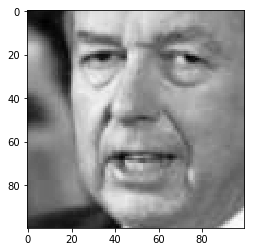

In [2]:
# The faces are stored in a 10000x100 matrix where each column contains the pixels corresponding to one image.
# The image's pixels are stacked one column on top of the next.
for i in range(0,3):   # This will plot the first 3 faces in the set "faces"
    fig = plt.figure()
    face = faces[:,i]
    face = np.reshape(face, (100,100), order='F') # We need to reshape the vector into a 250x250 image
    plt.imshow(face, cmap=cm.Greys_r)

Now let's see what happens when project these faces onto the first 100 principal components and reconstruct them

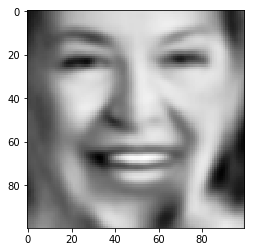

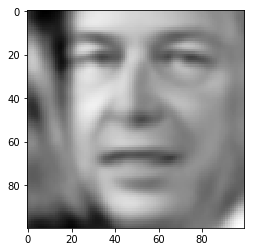

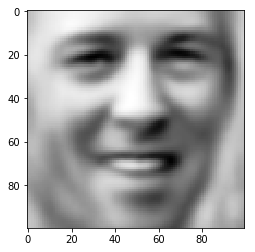

In [3]:
d = 100 #STUDENT, adjust this value to control the number of principal components used
# you can set d to be any value between 1 and 1000

for i in range(0,3):   # This will plot the first 3 faces in the set "faces"
    fig = plt.figure()
    face = faces[:,i] - faceMean                        # Center data around zero
    projected = np.dot(Upca[:,0:d].T, face)             # Project down into the d dimensional space
    reconstructed = np.dot(Upca[:,0:d], projected)      # Reconstruct the original image
    reconstructed = reconstructed + faceMean            # Add the mean back into the data
    reconstructed = np.reshape(reconstructed, (100,100), order='F')
    plt.imshow(reconstructed, cmap=cm.Greys_r)

Let's take a look at what information is contained in the principal components to get an idea of what each component is adding to the image

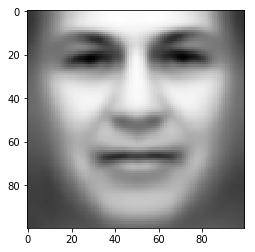

In [4]:
# Let's look at the mean of all of the faces
fig = plt.figure()
plt.imshow(np.reshape(faceMean,(100,100),order='F'), cmap=cm.Greys_r)

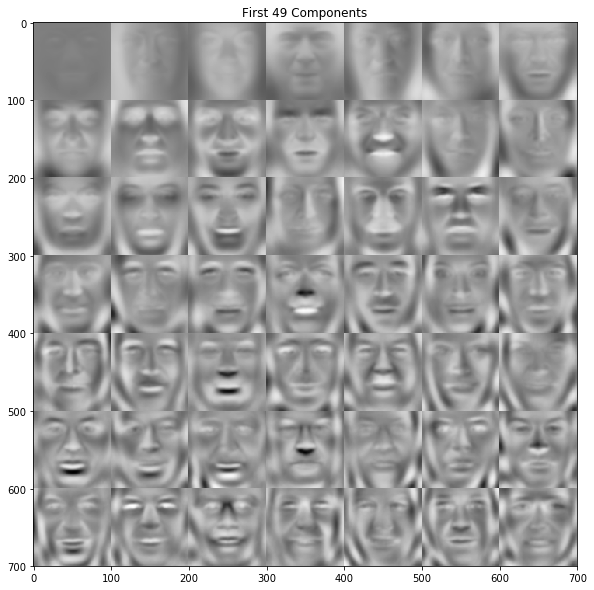

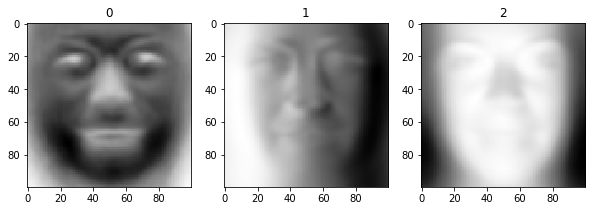

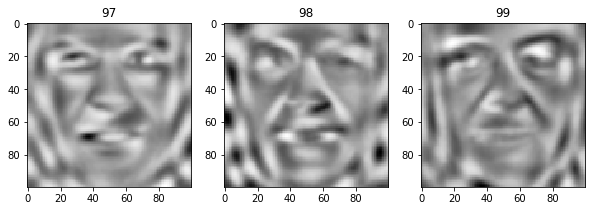

In [5]:
# Let's look at the first 49 principal components
# Note that since these components can be multiplied by positive or negative coefficients, 
# they might look like "inverted" images where dark and light are swapped.
n_side = 7
toShow = np.zeros((n_side*100,n_side*100))
for i in range(0,n_side):
    for j in range(0,n_side):
        face = Upca[:,n_side*i + j]
        face = np.reshape(face, (100,100), order='F')
        toShow[100*i:(100*i+100), 100*j:(100*j+100)] = face
fig = plt.figure(figsize = (10,10))
plt.imshow(toShow, cmap=cm.Greys_r)
plt.title('First 49 Components')

# These are the first 3 components
fig = plt.figure(figsize = (10,4))
for i in range(0,3):
    plt.subplot(131+i)
    face = Upca[:,i]
    face = np.reshape(face, (100,100), order='F')
    plt.imshow(face, cmap=cm.Greys_r)
    plt.title(i)
    
# And these are the 98th to the 100th components
fig = plt.figure(figsize = (10,4))
for i, j in enumerate(range(97,100)):
    plt.subplot(131+i)
    face = Upca[:,j]
    face = np.reshape(face, (100,100), order='F')
    plt.imshow(face, cmap=cm.Greys_r)
    plt.title(j)

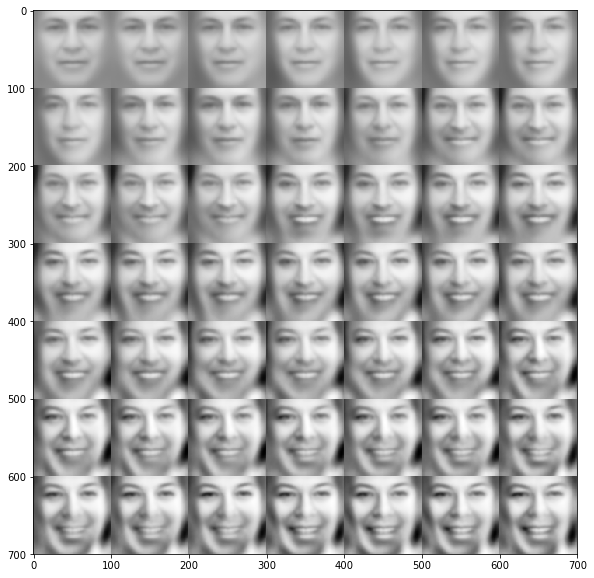

In [6]:
# Here are what each of the first 49 components do when they reconstruct the first sample face
n_side = 7
toShow = np.zeros((n_side*100,n_side*100))

fig = plt.figure(figsize = (10,10))
face = faces[:,0] - faceMean
projected = np.dot(Upca[:,0:d].T, face)
for i in range(0,n_side):
    for j in range(0,n_side):
        face = np.dot(Upca[:,1:(n_side*i + j)],projected[1:(n_side*i + j)])
        face = face + faceMean
        face = np.reshape(face, (100,100), order='F')
        toShow[100*i:(100*i+100), 100*j:(100*j+100)] = face
plt.imshow(toShow, cmap=cm.Greys_r)

The first two principal components capture the largest amount of variance in the data set.  Therefore, we can attempt to visualize the data set by plotting the first two dimensions of the transformed faces.

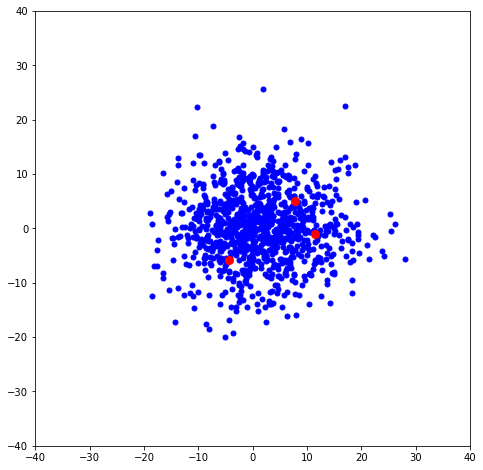

In [7]:
# Set up the plot so that it's the same size regardless of the data we plot
fig = plt.figure(figsize=(12,8))
plt.axes(xlim=(-40,40), ylim=(-40,40))

#STUDENT, adjust these values to plot different dimensions of the low-dimensional faces
x = 0 # This is the index of the principal component to plot on the x axis
y = 1 # This is the index of the principal component to plot on the y axis

# Plot the set of 1000 faces picked randomly from the data set
plt.plot(points[x,:],points[y,:],'.b',markersize=10)
lowFaces = np.dot(Upca.T, faces - np.reshape(faceMean,(10000,1)))

# Plot the 3 sample faces from above as red points to see where they lie compared to the data
r=range(0,3)
plt.plot(lowFaces[x,r],lowFaces[y,r],'.r',markersize=16)
plt.gca().set_aspect('equal')


Because we can compress an image of a face to a lower dimensional space, we can try to generate a "random" face by picking a point in the low dimensional space and then reconstructing the resulting image by multiplying by the transformation matrix U.  Let's see what kind of results we can get.

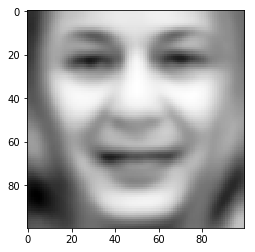

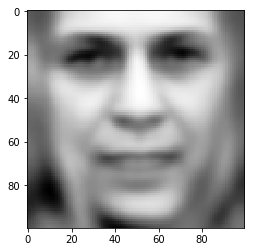

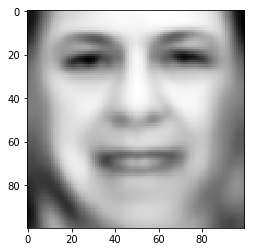

In [8]:
# We want to generate a random vector, but we don't want to pick a random point that lies far away
# from the training data.  Therefore, we use the variance of the example projected faces to make
# sure the random vector remains close to the training data.

d = 50 #STUDENT, adjust this value to control the number of principal components used
# you can set d to be any value between 1 and 1000

cov = np.cov(points.T) # This matrix uses the variation in the example projected faces
cov = cov[0:d,0:d]

for i in range(0,3):    # Let's generate a few examples
    fig = plt.figure()
    face = np.asmatrix(np.random.multivariate_normal(np.zeros(d),cov)).T
    face = np.dot(Upca[:,0:d], face)      # Transform the d-dimensional vector to the 100x100 image space
    face = face + np.reshape(faceMean, (10000,1))
    face = np.reshape(face, (100,100), order='F')
    plt.imshow(face, cmap=cm.Greys_r)